In [3]:
import pandas as pd
import numpy as np
import igraph as ig

In [4]:
g = ig.Graph(edges=[[0, 1], [2, 3]])

In [5]:
layout = g.layout(layout='auto')

In [7]:
coords_subgraph = layout[:2]  # Coordinates of the first two vertices

In [8]:
layout_subgraph = ig.Layout(coords=layout[:2])

<BarContainer object of 3 artists>

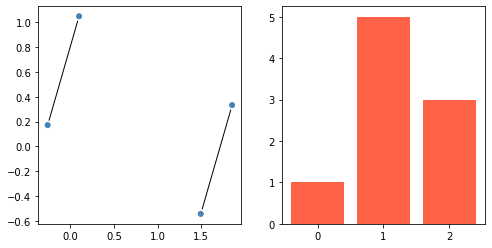

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ig.plot(g, target=axs[0])

axs[1].bar(x=[0, 1, 2], height=[1, 5, 3], color='tomato')

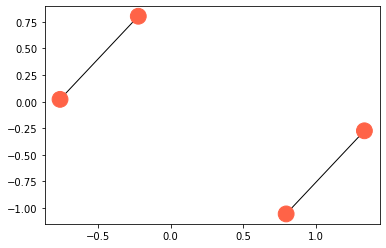

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ig.plot(g, target=ax)

dots = ax.get_children()[0] # This is a PathCollection

dots.set_color('tomato')

dots.set_sizes([250] * g.vcount())

In [30]:
g = ig.Graph.Famous("petersen")

ig.plot(g)

AttributeError: Plotting not available; please install pycairo or cairocffi